In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.linear_model import LogisticRegression, LinearRegression

from Quantum_Kernel import *
import warnings
warnings.filterwarnings("ignore")

In [92]:
sto_index_sets = []
sto_index_test_sets =[]
datasets_X_S =[]
datasets_y =[]
gram_gaussian_set =[]
gram_gaussian_test_set = []
gram_zz_kernel_set = []
gram_zz_kernel_test_set = [] 
gram_kernel_set = []
gram_kernel_test_set = []
folder = "svm_data4"

for i in range(5):
    sto_index_sets += [pd.read_csv(folder + "/sto_index_sets"+str(i)+".csv").iloc[:,1].tolist()]
    sto_index_test_sets += [pd.read_csv(folder + "/sto_index_test_sets"+str(i)+".csv").iloc[:,1].tolist()]
    datasets_X_S += [pd.read_csv(folder + "/datasets_X_S"+str(i)+".csv").iloc[:,1:].values.tolist()]
    datasets_y += [pd.read_csv(folder + "/datasets_y"+str(i)+".csv").iloc[:,1].values.tolist()]
    
    gram_gaussian_set += [pd.read_csv(folder + "/gram_gaussian_"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_gaussian_test_set += [pd.read_csv(folder + "/gram_gaussian_test"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_zz_kernel_set += [pd.read_csv(folder + "/gram_zz_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_zz_kernel_test_set += [pd.read_csv(folder + "/gram_zz_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_set += [pd.read_csv(folder + "/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv(folder + "/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]

In [93]:
i=0
comp=3
gram_gaussian_set = []
gram_gaussian_test_set = []

for i in range(5):

    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    data_sto = np.array(datasets_X_S[i])[sto_ind,:]

    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    data_sto_test = np.array(datasets_X_S[i])[sto_ind,:]

    gram_gaussian_set += [Gram_gaussian(data=data_sto,comp=comp)]
    gram_gaussian_test_set += [Gram_gaussian_test(data_sto,data_sto_test,comp=comp)]

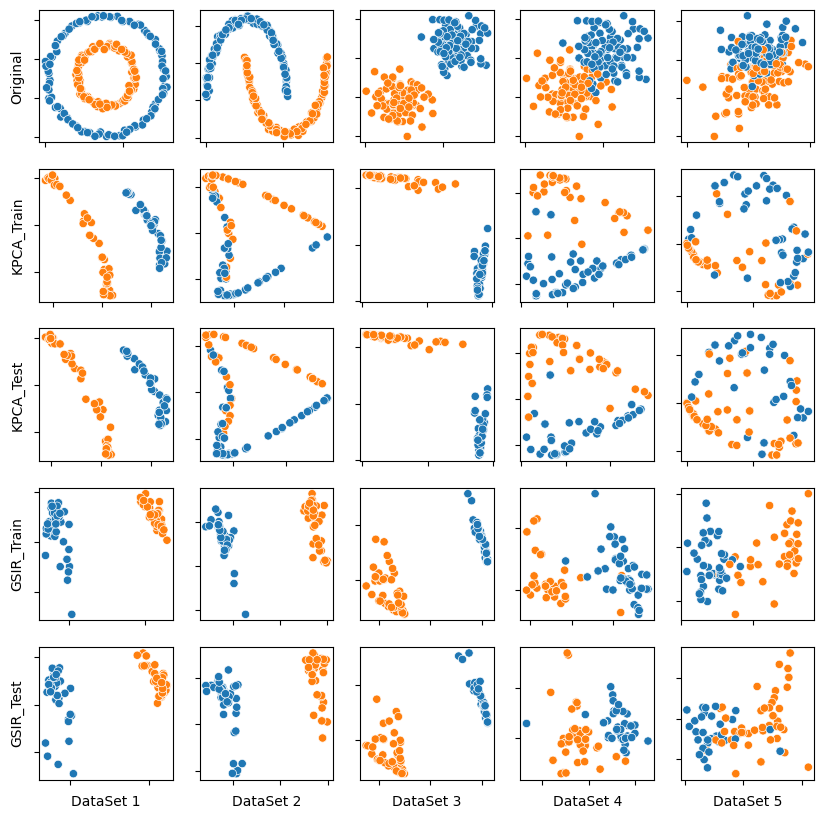

In [94]:
kernel_set = gram_gaussian_set
kernel_test_set = gram_gaussian_test_set
kpca = KPCA()
gsir = GSIR(0.01)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])
ylabel_list = ["Original","KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(5):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["DataSet 1","DataSet 2","DataSet 3","DataSet 4","DataSet 5"]
for i in range(5):
    ax[4,i].set(xlabel = xlabel_list[i])


plt.savefig(folder + "/DR_gaussian_kernel.jpg")
plt.show()

In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [6]:
kpca.fit(kernel_matrix)
plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:3])
plot_data.columns = ["x1","x2","x3"]
plot_data["ylabel"] = data_sto_y

px.scatter_3d(plot_data,x="x1",y="x2",z="x3",color = "ylabel")

In [7]:
kpca.fit(kernel_matrix)
plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:3])
plot_data.columns = ["x1","x2","x3"]
plot_data["ylabel"] = data_sto_test_y

px.scatter_3d(plot_data,x="x1",y="x2",z="x3",color = "ylabel")

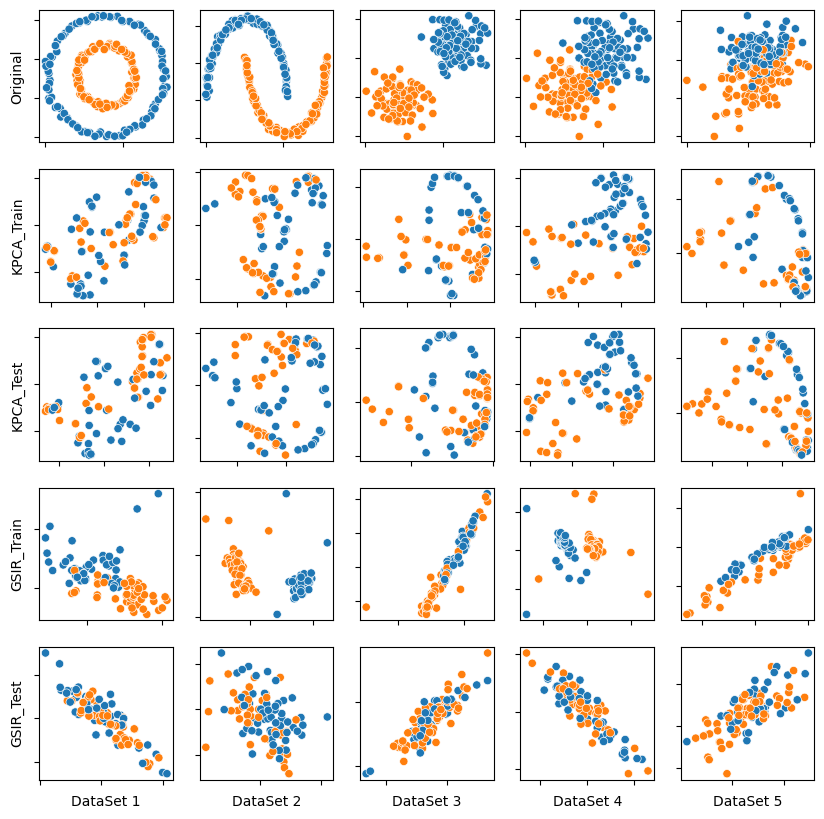

In [97]:
kernel_set = gram_zz_kernel_set
kernel_test_set = gram_zz_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

ylabel_list = ["Original","KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(5):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["DataSet 1","DataSet 2","DataSet 3","DataSet 4","DataSet 5"]
for i in range(5):
    ax[4,i].set(xlabel = xlabel_list[i])



plt.savefig(folder + "/DR_zz_kernel.jpg")
plt.show()

In [9]:
i=0
kernel_matrix = gram_zz_kernel_set[i]
kernel_test_matrix = gram_zz_kernel_test_set[i]
sto_ind = sto_index_sets[i]
data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
sto_ind = sto_index_test_sets[i]
data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)

kpca.fit(kernel_matrix)
plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:3])
plot_data.columns = ["x1","x2","x3"]
plot_data["ylabel"] = data_sto_y

px.scatter_3d(plot_data,x="x1",y="x2",z="x3",color = "ylabel")

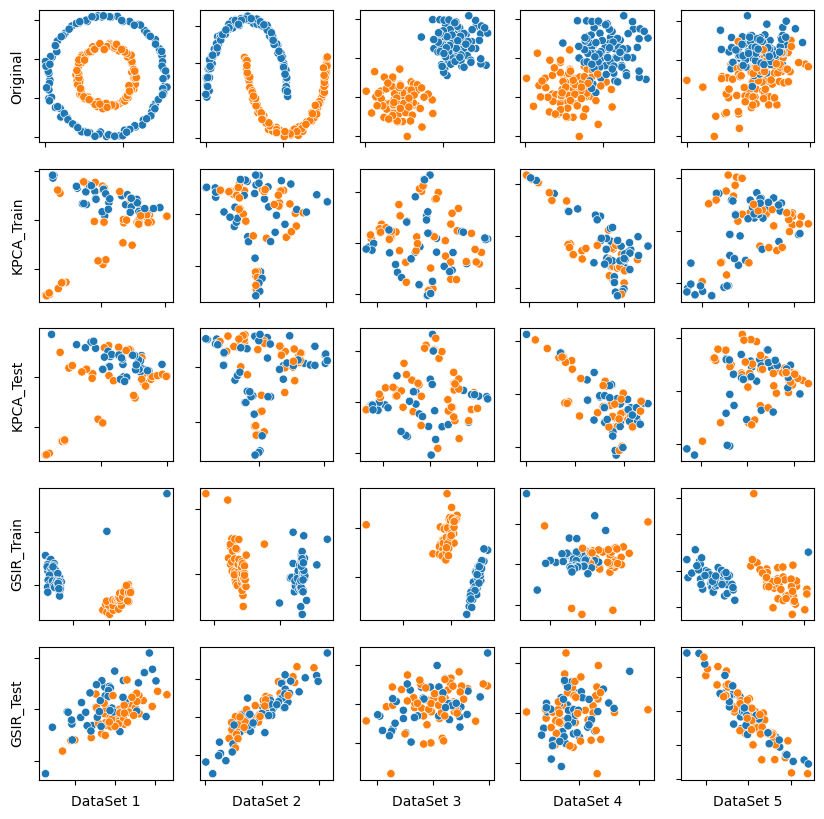

In [10]:
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

ylabel_list = ["Original","KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(5):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["DataSet 1","DataSet 2","DataSet 3","DataSet 4","DataSet 5"]
for i in range(5):
    ax[4,i].set(xlabel = xlabel_list[i])



plt.savefig(folder + "/DR_custom_kernel.jpg")
plt.show()

In [11]:
kernel_list = [gram_gaussian_set,gram_zz_kernel_set,gram_kernel_set]
kernel_test_list = [gram_gaussian_test_set,gram_zz_kernel_test_set,gram_gaussian_test_set]
total_result = []
for j in range(3):
    kernel_set = kernel_list[j]
    kernel_test_set = kernel_test_list[j] 

    train_score = []
    test_score = []
    svm = SVM(1)

    for i in range(5):
        sto_ind = sto_index_sets[i]
        data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    
        sto_ind = sto_index_test_sets[i]
        data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    
        kernel_matrix = kernel_set[i]
        kernel_test_matrix = kernel_test_set[i]

        svm.fit(kernel_matrix,data_sto_y)
        train_score += [svm.score(kernel_matrix,data_sto_y)]
        test_score += [svm.score(kernel_test_matrix,data_sto_test_y)]


    result = pd.DataFrame([train_score,test_score])
    result.index = ["Train Score","Test Score"]
    result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
    total_result += result.values.tolist()
total_result = pd.DataFrame(total_result)
total_result.index = ["Gaussian_Train","Gaussian_Test","zz_kernel_Train","zz_kerenl_Test","custom_kernel_Train","custom_kerenl_Test"]
total_result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
total_result.to_csv(folder + "/SVM_Result.csv")

In [12]:
total_result

,Data Set 1,Data Set 2,Data Set 3,Data Set 4,Data Set 5
Gaussian_Train,0.96,0.90,1.00,0.95,0.89
Gaussian_Test,0.90,0.96,1.00,0.93,0.84
zz_kernel_Train,0.75,0.86,0.79,0.88,0.64
zz_kerenl_Test,0.69,0.82,0.79,0.76,0.53
custom_kernel_Train,0.86,0.89,0.77,0.76,0.87
custom_kerenl_Test,0.90,0.96,1.00,0.93,0.84


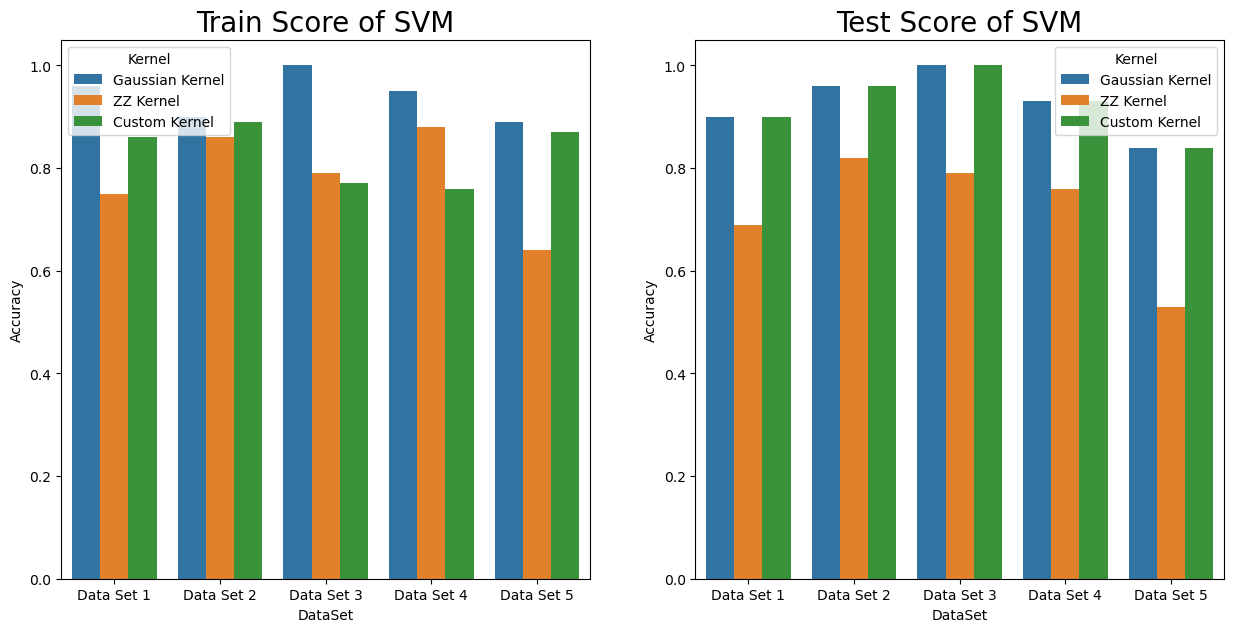

In [13]:
plot_train = pd.DataFrame(pd.concat([total_result.iloc[0,:],total_result.iloc[2,:],total_result.iloc[4,:]]))
plot_train.columns = ["Accuracy"]
plot_train["DataSet"] = plot_train.index
plot_train["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plot_test = pd.DataFrame(pd.concat([total_result.iloc[1,:],total_result.iloc[3,:],total_result.iloc[5,:]]))
plot_test.columns = ["Accuracy"]
plot_test["DataSet"] = plot_test.index
plot_test["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.barplot(data=plot_train, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Train Score of SVM",fontsize=20)
plt.subplot(122)
sns.barplot(data=plot_test, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Test Score of SVM",fontsize=20)

plt.savefig(folder + "/SVM_result.jpg")
plt.show()

In [98]:
n_dimension = 3


kernel_list = [gram_gaussian_set,gram_zz_kernel_set,gram_kernel_set]
kernel_test_list = [gram_gaussian_test_set,gram_zz_kernel_test_set,gram_gaussian_test_set]
total_result = []

for j in range(3):
    kernel_set = kernel_list[j]
    kernel_test_set = kernel_test_list[j] 

    train_score = []
    test_score = []
    clf = LogisticRegression()
    gsir = GSIR()
    kpca = KPCA()

    for i in range(5):
        sto_ind = sto_index_sets[i]
        data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    
        sto_ind = sto_index_test_sets[i]
        data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    
        kernel_matrix = kernel_set[i]
        kernel_test_matrix = kernel_test_set[i]

        gsir.fit(kernel_matrix,data_sto_y.values)
        gsir_test = gsir.transform(kernel_test_matrix)
        gsir_train = gsir.transform(kernel_matrix)
        clf.fit(gsir_train[:,:n_dimension],data_sto_y)
        train_score += [clf.score(gsir_train[:,:n_dimension],data_sto_y)]
        test_score += [clf.score(gsir_test[:,:n_dimension],data_sto_test_y)]


    result = pd.DataFrame([train_score,test_score])
    result.index = ["Train Score","Test Score"]
    result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
    total_result += result.values.tolist()
total_result = pd.DataFrame(total_result)
total_result.index = ["Gaussian_Train","Gaussian_Test","zz_kernel_Train","zz_kerenl_Test","custom_kernel_Train","custom_kerenl_Test"]
total_result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
total_result.to_csv(folder + "/SVM_Result.csv")

In [99]:
total_result

,Data Set 1,Data Set 2,Data Set 3,Data Set 4,Data Set 5
Gaussian_Train,1.00,1.00,1.00,0.77,0.91
Gaussian_Test,1.00,1.00,1.00,0.78,0.77
zz_kernel_Train,0.77,1.00,0.73,0.74,0.76
zz_kerenl_Test,0.56,0.56,0.43,0.47,0.54
custom_kernel_Train,0.99,1.00,1.00,0.74,0.95
custom_kerenl_Test,0.58,0.66,0.55,0.84,0.49


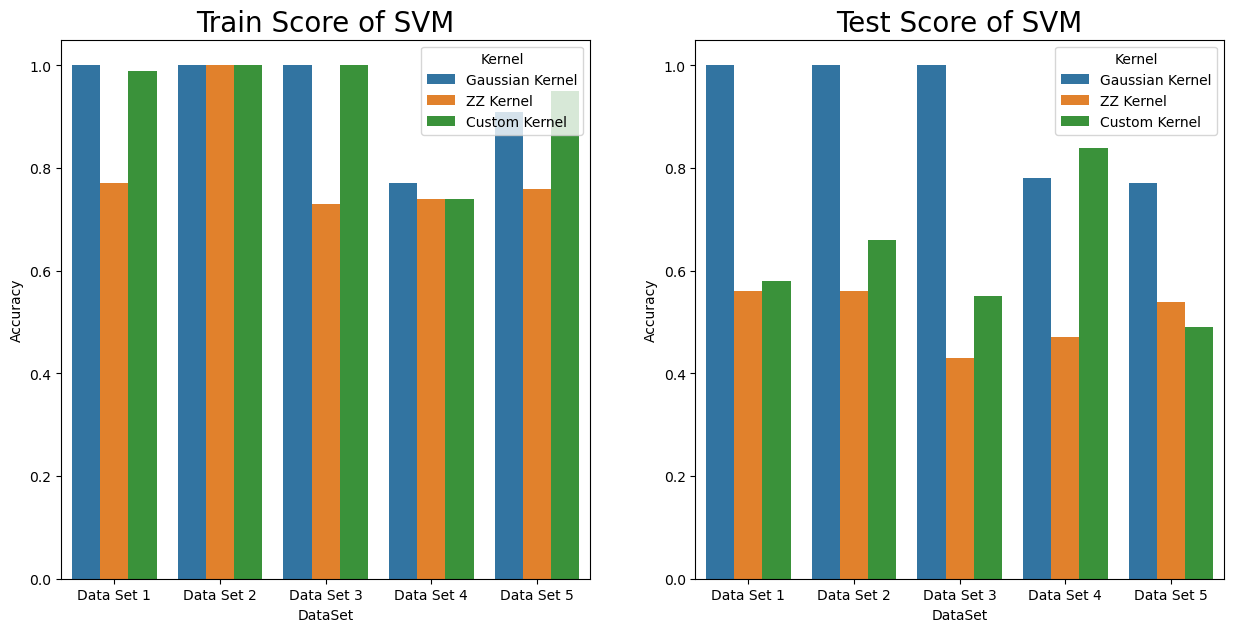

In [100]:
plot_train = pd.DataFrame(pd.concat([total_result.iloc[0,:],total_result.iloc[2,:],total_result.iloc[4,:]]))
plot_train.columns = ["Accuracy"]
plot_train["DataSet"] = plot_train.index
plot_train["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plot_test = pd.DataFrame(pd.concat([total_result.iloc[1,:],total_result.iloc[3,:],total_result.iloc[5,:]]))
plot_test.columns = ["Accuracy"]
plot_test["DataSet"] = plot_test.index
plot_test["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.barplot(data=plot_train, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Train Score of SVM",fontsize=20)
plt.subplot(122)
sns.barplot(data=plot_test, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Test Score of SVM",fontsize=20)

plt.savefig(folder + "/SVM_result.jpg")
plt.show()

In [34]:
n_dimension = 3
dr = KPCA()


kernel_list = [gram_gaussian_set,gram_zz_kernel_set,gram_kernel_set]
kernel_test_list = [gram_gaussian_test_set,gram_zz_kernel_test_set,gram_gaussian_test_set]
total_result = []

for j in range(3):
    kernel_set = kernel_list[j]
    kernel_test_set = kernel_test_list[j] 

    train_score = []
    test_score = []
    clf = LogisticRegression()


    for i in range(5):
        sto_ind = sto_index_sets[i]
        data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    
        sto_ind = sto_index_test_sets[i]
        data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    
        kernel_matrix = kernel_set[i]
        kernel_test_matrix = kernel_test_set[i]

        dr.fit(kernel_matrix)
        dr_test = dr.transform(kernel_test_matrix)
        dr_train = dr.transform(kernel_matrix)
        clf.fit(dr_train[:,:n_dimension],data_sto_y)
        train_score += [clf.score(dr_train[:,:n_dimension],data_sto_y)]
        test_score += [clf.score(dr_test[:,:n_dimension],data_sto_test_y)]


    result = pd.DataFrame([train_score,test_score])
    result.index = ["Train Score","Test Score"]
    result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
    total_result += result.values.tolist()
total_result = pd.DataFrame(total_result)
total_result.index = ["Gaussian_Train","Gaussian_Test","zz_kernel_Train","zz_kerenl_Test","custom_kernel_Train","custom_kerenl_Test"]
total_result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
total_result.to_csv(folder + "/SVM_Result.csv")

In [30]:
total_result

,Data Set 1,Data Set 2,Data Set 3,Data Set 4,Data Set 5
Gaussian_Train,1.00,0.86,1.00,0.90,0.83
Gaussian_Test,1.00,0.81,1.00,0.88,0.84
zz_kernel_Train,0.59,0.77,0.69,0.85,0.60
zz_kerenl_Test,0.63,0.77,0.62,0.76,0.57
custom_kernel_Train,0.76,0.76,0.66,0.70,0.75
custom_kerenl_Test,0.76,0.84,1.00,0.85,0.68


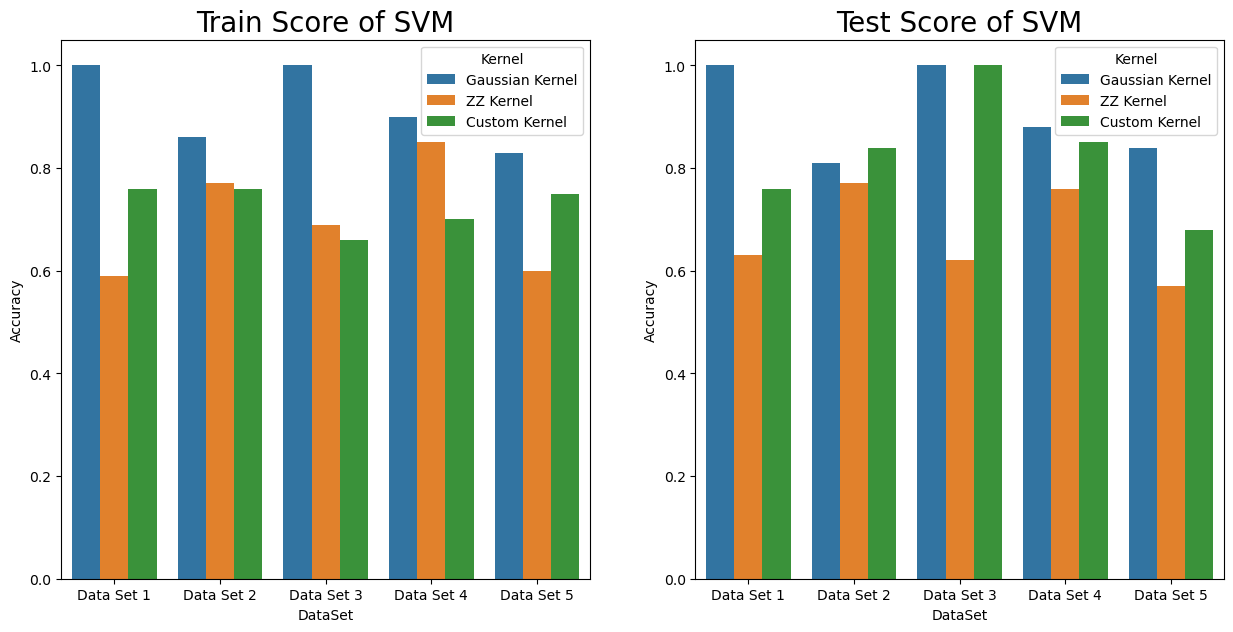

In [31]:
plot_train = pd.DataFrame(pd.concat([total_result.iloc[0,:],total_result.iloc[2,:],total_result.iloc[4,:]]))
plot_train.columns = ["Accuracy"]
plot_train["DataSet"] = plot_train.index
plot_train["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plot_test = pd.DataFrame(pd.concat([total_result.iloc[1,:],total_result.iloc[3,:],total_result.iloc[5,:]]))
plot_test.columns = ["Accuracy"]
plot_test["DataSet"] = plot_test.index
plot_test["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.barplot(data=plot_train, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Train Score of SVM",fontsize=20)
plt.subplot(122)
sns.barplot(data=plot_test, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Test Score of SVM",fontsize=20)

plt.savefig(folder + "/SVM_result.jpg")
plt.show()

In [150]:
gram_kernel_set = []
gram_kernel_test_set = []
folder = "pendigit4"
sto_index = pd.read_csv(folder + "/sto_index.csv").iloc[:,1].tolist()
sto_index_test = pd.read_csv(folder + "/sto_test_index.csv").iloc[:,1].tolist()
datasets_X_S = pd.read_csv(folder + "/datasets_X_S.csv").iloc[:,1:]
datasets_y = pd.read_csv(folder + "/datasets_y.csv").iloc[:,1:]
    
for i in range(7):
    gram_kernel_set += [pd.read_csv(folder + "/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv(folder + "/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]


In [151]:
data_sto = np.array(datasets_X_S)[sto_index,:]
data_sto_test = np.array(datasets_X_S)[sto_index_test,:]
comp=1

gram_kernel_set[0] = Gram_gaussian(data=data_sto,comp=comp)
gram_kernel_test_set[0] = Gram_gaussian_test(data_sto,data_sto_test,comp=comp)

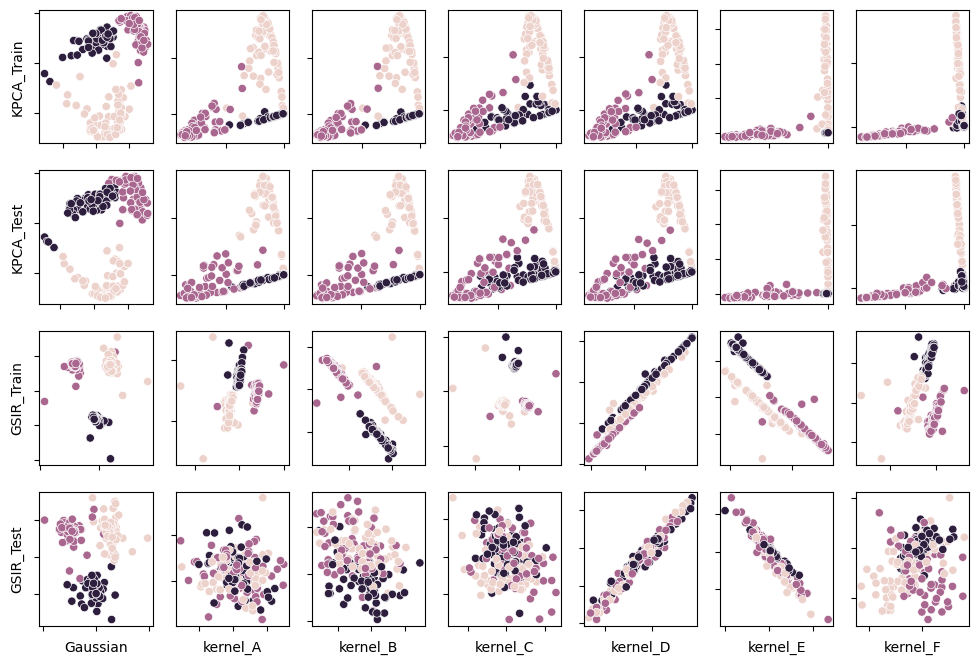

In [153]:
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001)
n_kernel = 7

data_sto_y =pd.DataFrame(datasets_y).iloc[sto_index,:].values.reshape(-1)

data_sto_test_y =pd.DataFrame(datasets_y).iloc[sto_index_test,:].values.reshape(-1)

fig,ax = plt.subplots(4,n_kernel ,figsize = (12,8))
    
for i in range(n_kernel):
    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[2,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])


    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

ylabel_list = ["KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(4):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["Gaussian","kernel_A","kernel_B","kernel_C","kernel_D","kernel_E","kernel_F"]
for i in range(n_kernel):
    ax[3,i].set(xlabel = xlabel_list[i])

plt.savefig(folder + "/DR_kernel.jpg")
plt.show()

In [159]:
n_train = len(data_sto_y)
n_test = len(data_sto_test_y)
y_train = 2.0*(data_sto_y==0)-1.0
y_test = 2.0*(data_sto_test_y==0)-1.0

svm = SVM()
accuracy_train_list =[]
accuracy_test_list =[]

for i in range(7):
    svm.fit(kernel_set[i],y_train)
    y_pred = svm.predict(kernel_set[i])
    accuracy_train_list += [sum(y_pred==y_train)/n_train]
    y_pred = svm.predict(kernel_test_set[i])
    accuracy_test_list += [sum(y_pred==y_test)/n_test]

result = pd.DataFrame([accuracy_train_list,accuracy_test_list])
result.columns = ["Gaussian","kernel_A","kernel_B","kernel_C","kernel_D","kernel_E","kernel_F"]
result.index = ["Train Accuracy","Test Accuracy"]
result


,Gaussian,kernel_A,kernel_B,kernel_C,kernel_D,kernel_E,kernel_F
Train Accuracy,0.960,0.985,0.985,0.98,0.98,0.995,0.995
Test Accuracy,0.975,0.995,0.995,0.98,0.98,1.000,0.995


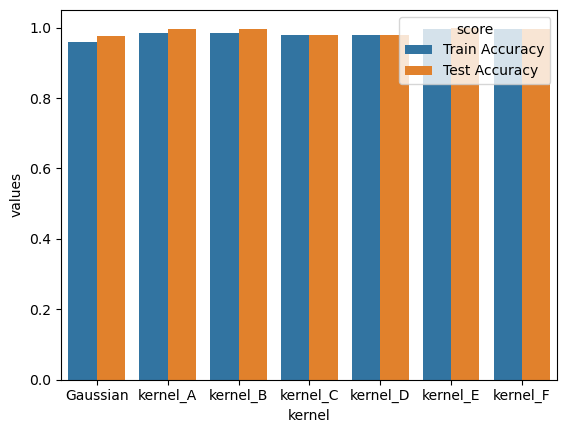

In [160]:
plot_data = pd.DataFrame([result.values.flatten(),result.columns.tolist()+result.columns.tolist(),["Train Accuracy" for i in range(7)] + ["Test Accuracy" for i in range(7)]]).T
plot_data.columns = ["values","kernel","score"]
sns.barplot(x="kernel",y="values",hue="score",data=plot_data)
plt.show()

In [169]:
n_dimension = 5
dr = KPCA()

train_score = []
test_score = []
clf = LogisticRegression()

for i in range(7):
    kernel_matrix = kernel_set[i]
    kernel_test_matrix = kernel_test_set[i]

    dr.fit(kernel_matrix)
    dr_test = dr.transform(kernel_test_matrix)
    dr_train = dr.transform(kernel_matrix)
    clf.fit(dr_train[:,:n_dimension],y_train)
    train_score += [clf.score(dr_train[:,:n_dimension],y_train)]
    test_score += [clf.score(dr_test[:,:n_dimension],y_test)]

result = pd.DataFrame([train_score,test_score])
result.columns = ["Gaussian","kernel_A","kernel_B","kernel_C","kernel_D","kernel_E","kernel_F"]
result.index = ["Train Accuracy","Test Accuracy"]
result

,Gaussian,kernel_A,kernel_B,kernel_C,kernel_D,kernel_E,kernel_F
Train Accuracy,0.975,0.970,0.970,0.96,0.96,0.935,0.94
Test Accuracy,0.985,0.985,0.985,0.98,0.98,0.985,0.99


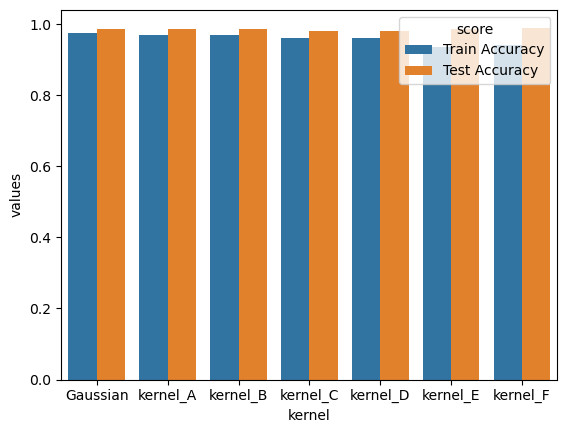

In [170]:
plot_data = pd.DataFrame([result.values.flatten(),result.columns.tolist()+result.columns.tolist(),["Train Accuracy" for i in range(7)] + ["Test Accuracy" for i in range(7)]]).T
plot_data.columns = ["values","kernel","score"]
sns.barplot(x="kernel",y="values",hue="score",data=plot_data)
plt.show()

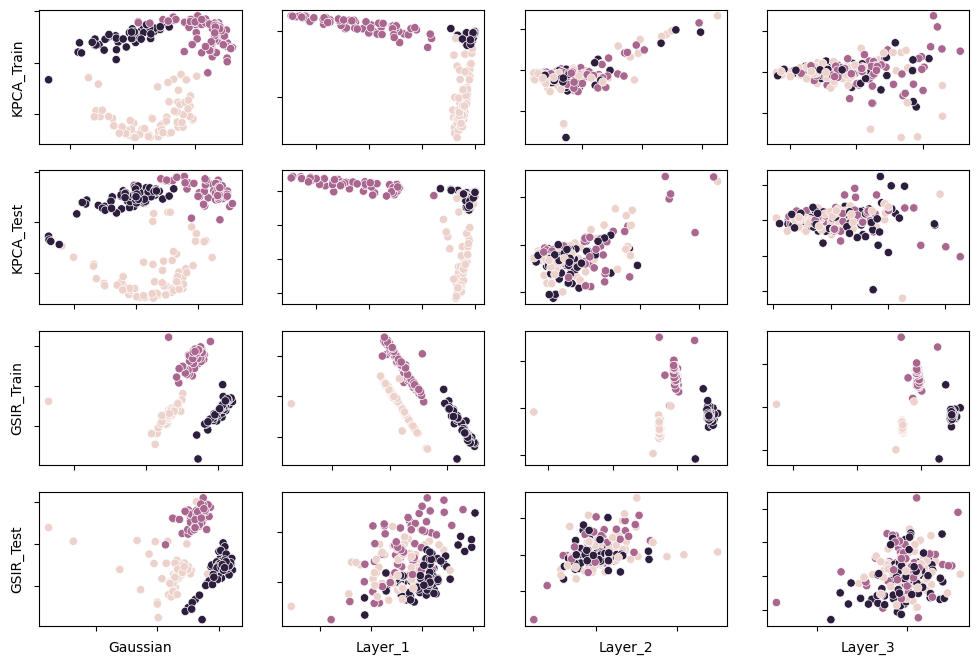

In [137]:
gram_kernel_set = []
gram_kernel_test_set = []
folder = "pendigit_layer2"
sto_index = pd.read_csv(folder + "/sto_index.csv").iloc[:,1].tolist()
sto_index_test = pd.read_csv(folder + "/sto_test_index.csv").iloc[:,1].tolist()
datasets_X_S = pd.read_csv(folder + "/datasets_X_S.csv").iloc[:,1:]
datasets_y = pd.read_csv(folder + "/datasets_y.csv").iloc[:,1:]
n_kernel = 4
for i in range(n_kernel):
    gram_kernel_set += [pd.read_csv(folder + "/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv(folder + "/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]

data_sto = np.array(datasets_X_S)[sto_index,:]
data_sto_test = np.array(datasets_X_S)[sto_index_test,:]
comp=1
gram_kernel_set[0] = Gram_gaussian(data=data_sto,comp=comp)
gram_kernel_test_set[0] = Gram_gaussian_test(data_sto,data_sto_test,comp=comp)
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001)

data_sto_y =pd.DataFrame(datasets_y).iloc[sto_index,:].values.reshape(-1)

data_sto_test_y =pd.DataFrame(datasets_y).iloc[sto_index_test,:].values.reshape(-1)

fig,ax = plt.subplots(4,n_kernel ,figsize = (12,8))
    
for i in range(n_kernel):
    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[2,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])


    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

ylabel_list = ["KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(4):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["Gaussian","Layer_1","Layer_2","Layer_3"]
for i in range(n_kernel):
    ax[3,i].set(xlabel = xlabel_list[i])

plt.savefig(folder + "/DR_kernel.jpg")
plt.show()

In [138]:
n_train = len(data_sto_y)
n_test = len(data_sto_test_y)
y_train = 2.0*(data_sto_y==0)-1.0
y_test = 2.0*(data_sto_test_y==0)-1.0

svm = SVM()
accuracy_train_list =[]
accuracy_test_list =[]

for i in range(4):
    svm.fit(kernel_set[i],y_train)
    y_pred = svm.predict(kernel_set[i])
    accuracy_train_list += [sum(y_pred==y_train)/n_train]
    y_pred = svm.predict(kernel_test_set[i])
    accuracy_test_list += [sum(y_pred==y_test)/n_test]

result = pd.DataFrame([accuracy_train_list,accuracy_test_list])
result.columns = ["Gaussian","Layer_1","Layer_2","Layer_3"]
result.index = ["Train Accuracy","Test Accuracy"]
result


,Gaussian,Layer_1,Layer_2,Layer_3
Train Accuracy,0.945,0.995,0.99,1.000
Test Accuracy,0.930,0.980,0.68,0.575


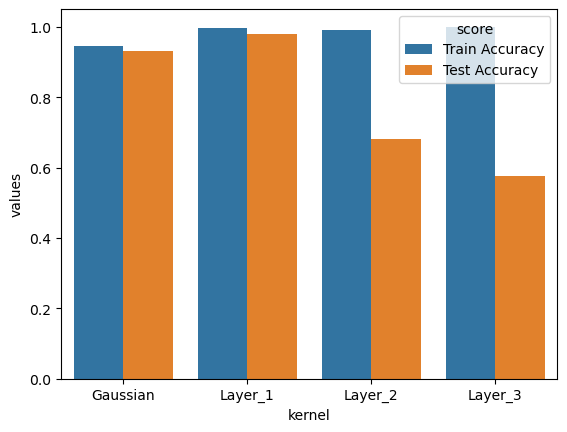

In [135]:
n_row = len(result.columns)
plot_data = pd.DataFrame([result.values.flatten(),result.columns.tolist()+result.columns.tolist(),["Train Accuracy" for i in range(n_row)] + ["Test Accuracy" for i in range(n_row)]]).T
plot_data.columns = ["values","kernel","score"]
sns.barplot(x="kernel",y="values",hue="score",data=plot_data)
plt.show()

In [147]:
n_dimension = 3
dr = GSIR(0.01,0.01)

train_score = []
test_score = []
clf = LogisticRegression()

for i in range(4):
    kernel_matrix = kernel_set[i]
    kernel_test_matrix = kernel_test_set[i]

    dr.fit(kernel_matrix,y_train)
    dr_test = dr.transform(kernel_test_matrix)
    dr_train = dr.transform(kernel_matrix)
    clf.fit(dr_train[:,:n_dimension],y_train)
    train_score += [clf.score(dr_train[:,:n_dimension],y_train)]
    test_score += [clf.score(dr_test[:,:n_dimension],y_test)]

result = pd.DataFrame([train_score,test_score])
result.columns = ["Gaussian","Layer_1","Layer_2","Layer_3"]
result.index = ["Train Accuracy","Test Accuracy"]
result

,Gaussian,Layer_1,Layer_2,Layer_3
Train Accuracy,0.63,0.675,0.63,0.635
Test Accuracy,0.68,0.610,0.65,0.655


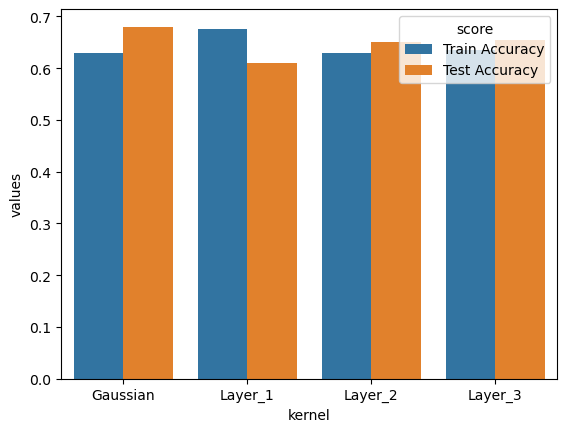

In [148]:
n_row = len(result.columns)
plot_data = pd.DataFrame([result.values.flatten(),result.columns.tolist()+result.columns.tolist(),["Train Accuracy" for i in range(n_row)] + ["Test Accuracy" for i in range(n_row)]]).T
plot_data.columns = ["values","kernel","score"]
sns.barplot(x="kernel",y="values",hue="score",data=plot_data)
plt.show()

In [180]:
mat = pd.read_csv("malaria/Mat_train.csv")

In [178]:
gram_kernel_set = []
gram_kernel_test_set = []
folder = "malaria3"
sto_index = pd.read_csv(folder + "/sto_index.csv").iloc[:,1].tolist()
sto_index_test = pd.read_csv(folder + "/sto_test_index.csv").iloc[:,1].tolist()
datasets_X_S = pd.read_csv(folder + "/datasets_X_S.csv").iloc[:,1:]
datasets_y = pd.read_csv(folder + "/datasets_y.csv").iloc[:,1:]
    
for i in range(5):
    gram_kernel_set += [pd.read_csv(folder + "/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv(folder + "/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]

In [179]:
data_sto = np.array(datasets_X_S)[sto_index,:]
data_sto_test = np.array(datasets_X_S)[sto_index_test,:]
comp=1

gram_kernel_set[0] = Gram_gaussian(data=data_sto,comp=comp)
gram_kernel_test_set[0] = Gram_gaussian_test(data_sto,data_sto_test,comp=comp)

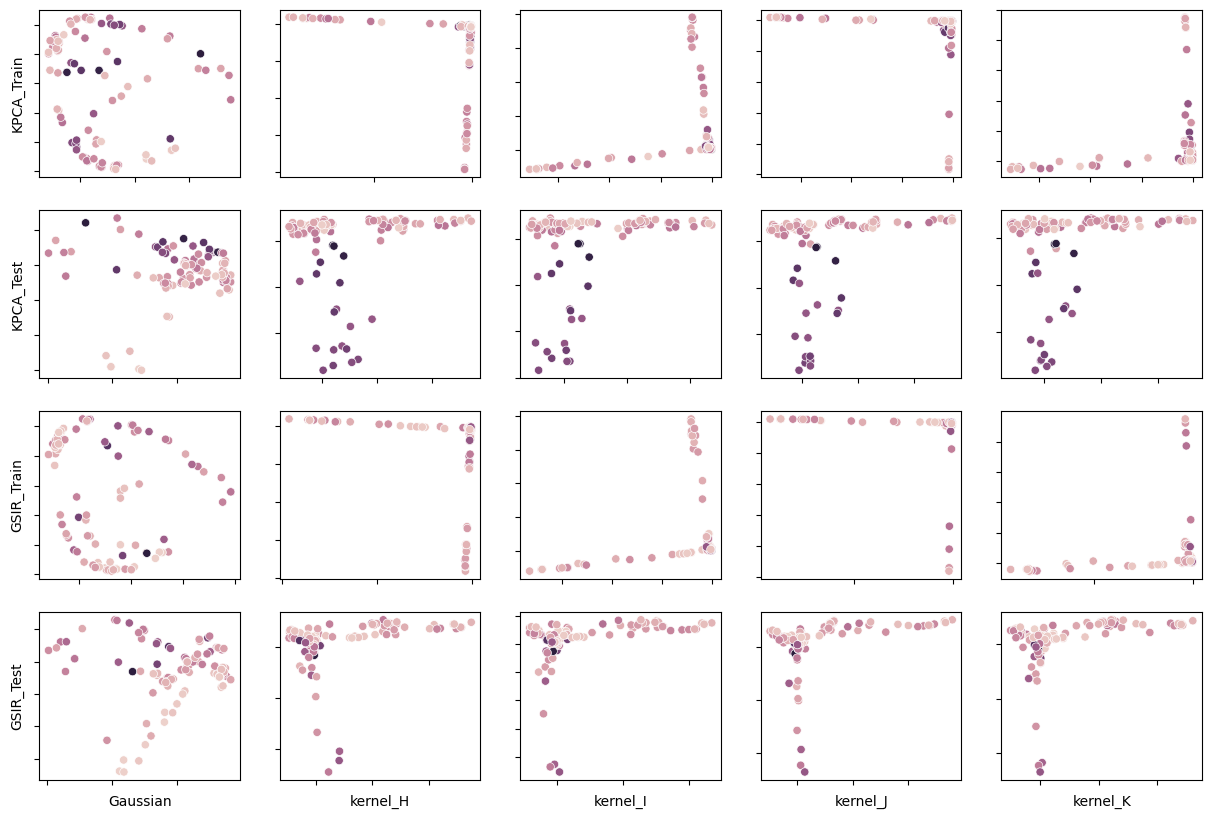

In [177]:
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.5,0.5,y_type="Continuous")


data_sto_y =pd.DataFrame(datasets_y).iloc[sto_index,:].values.reshape(-1)

data_sto_test_y =pd.DataFrame(datasets_y).iloc[sto_index_test,:].values.reshape(-1)

fig,ax = plt.subplots(4,5,figsize = (15,10))
    
for i in range(5):
    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y.reshape((-1,1)))
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[1,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])


ylabel_list = ["KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(4):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["Gaussian","kernel_H","kernel_I","kernel_J","kernel_K"]
for i in range(5):
    ax[3,i].set(xlabel = xlabel_list[i])


plt.savefig(folder + "/DR_kernel.jpg")
plt.show()

In [183]:
kr = Kernel_Regression()
kr.fit(data_sto_y)
r_square_train_list =[]
r_square_test_list =[]

for i in range(5):
    y_pred = kr.predict(kernel_set[i])
    r_square_train_list += [1-np.sum((y_pred-data_sto_y)**2)/np.sum(data_sto_y**2)]
for i in range(5):
    y_pred = kr.predict(kernel_test_set[i])
    r_square_test_list += [1-np.sum((y_pred-data_sto_test_y)**2)/np.sum(data_sto_test_y**2)]

result = pd.DataFrame([r_square_train_list,r_square_test_list])
result.columns = ["Gaussian","kernel_H","kernel_I","kernel_J","kernel_K"]
result.index = ["Train R Square","Test R Square"]
result

,Gaussian,kernel_H,kernel_I,kernel_J,kernel_K
Train R Square,0.738318,0.952248,0.959714,0.956414,0.9430
Test R Square,0.673058,0.643545,0.640623,0.636662,0.6571


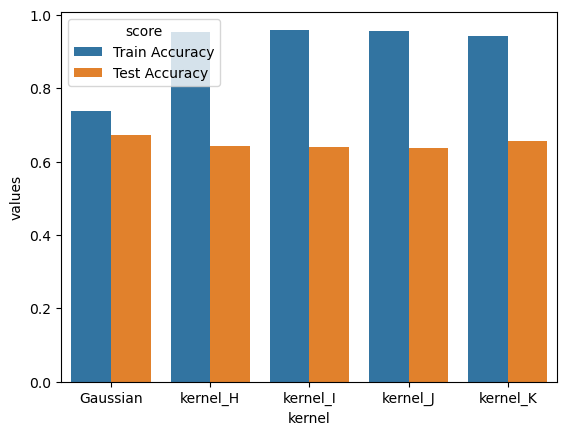

In [184]:
n_row = len(result.columns)
plot_data = pd.DataFrame([result.values.flatten(),result.columns.tolist()+result.columns.tolist(),["Train Accuracy" for i in range(n_row)] + ["Test Accuracy" for i in range(n_row)]]).T
plot_data.columns = ["values","kernel","score"]
sns.barplot(x="kernel",y="values",hue="score",data=plot_data)
plt.show()

In [56]:
n_dimension=2
lr = LinearRegression()
gsir = GSIR()
r_square_train_list =[]
r_square_test_list =[]


for i in range(5):
    kernel_matrix = kernel_set[i]
    kernel_test_matrix = kernel_test_set[i]

    gsir.fit(kernel_matrix,data_sto_y)
    gsir_train = gsir.transform(kernel_matrix)[:,:n_dimension]
    gsir_test = gsir.transform(kernel_test_matrix)[:,:n_dimension]

    lr.fit(gsir_train,data_sto_y)
    y_pred = lr.predict(gsir_train)
    r_square_train_list += [1-np.sum((y_pred-data_sto_y)**2)/np.sum(data_sto_y**2)]
    
    y_pred = lr.predict(gsir_test)
    r_square_test_list += [1-np.sum((y_pred-data_sto_test_y)**2)/np.sum(data_sto_test_y**2)]

result = pd.DataFrame([r_square_train_list,r_square_test_list])
result.columns = ["Gaussian","kernel_H","kernel_I","kernel_J","kernel_K"]
result.index = ["Train R Square","Test R Square"]
result

,Gaussian,kernel_H,kernel_I,kernel_J,kernel_K
Train R Square,0.779338,0.725331,0.725376,0.722969,0.725171
Test R Square,0.724543,0.584836,0.103728,0.167760,0.569454


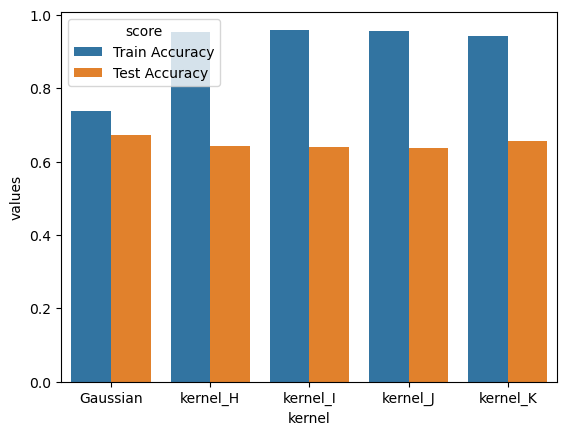

In [185]:
n_row = len(result.columns)
plot_data = pd.DataFrame([result.values.flatten(),result.columns.tolist()+result.columns.tolist(),["Train Accuracy" for i in range(n_row)] + ["Test Accuracy" for i in range(n_row)]]).T
plot_data.columns = ["values","kernel","score"]
sns.barplot(x="kernel",y="values",hue="score",data=plot_data)
plt.show()

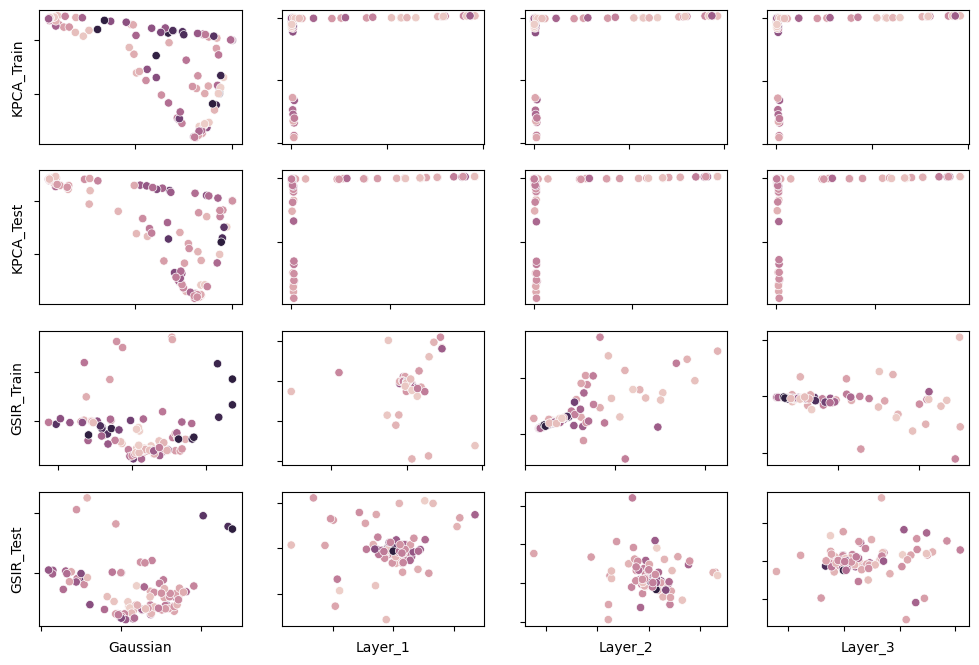

In [57]:
gram_kernel_set = []
gram_kernel_test_set = []
folder = "malaria_layer2"
sto_index = pd.read_csv(folder + "/sto_index.csv").iloc[:,1].tolist()
sto_index_test = pd.read_csv(folder + "/sto_test_index.csv").iloc[:,1].tolist()
datasets_X_S = pd.read_csv(folder + "/datasets_X_S.csv").iloc[:,1:]
datasets_y = pd.read_csv(folder + "/datasets_y.csv").iloc[:,1:]
n_kernel = 4
for i in range(n_kernel):
    gram_kernel_set += [pd.read_csv(folder + "/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv(folder + "/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]

data_sto = np.array(datasets_X_S)[sto_index,:]
data_sto_test = np.array(datasets_X_S)[sto_index_test,:]
comp=3
gram_kernel_set[0] = Gram_gaussian(data=data_sto,comp=comp)
gram_kernel_test_set[0] = Gram_gaussian_test(data_sto,data_sto_test,comp=comp)
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.001,0.001)

data_sto_y =pd.DataFrame(datasets_y).iloc[sto_index,:].values.reshape(-1)

data_sto_test_y =pd.DataFrame(datasets_y).iloc[sto_index_test,:].values.reshape(-1)

fig,ax = plt.subplots(4,n_kernel ,figsize = (12,8))
    
for i in range(n_kernel):
    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[2,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])


    kernel_test_matrix = kernel_test_set[i]
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

ylabel_list = ["KPCA_Train","KPCA_Test","GSIR_Train","GSIR_Test"]
for i in range(4):
    ax[i,0].set(ylabel = ylabel_list[i])

xlabel_list = ["Gaussian","Layer_1","Layer_2","Layer_3"]
for i in range(n_kernel):
    ax[3,i].set(xlabel = xlabel_list[i])

plt.savefig(folder + "/DR_kernel.jpg")
plt.show()

In [186]:
kernel_matrix_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set

kr = Kernel_Regression()
kr.fit(data_sto_y)
r_square_train_list =[]
r_square_test_list =[]

for i in range(4):
    y_pred = kr.predict(kernel_set[i])
    r_square_train_list += [1-np.sum((y_pred-data_sto_y)**2)/np.sum(data_sto_y**2)]
for i in range(4):
    y_pred = kr.predict(kernel_test_set[i])
    r_square_test_list += [1-np.sum((y_pred-data_sto_test_y)**2)/np.sum(data_sto_test_y**2)]

result = pd.DataFrame([r_square_train_list,r_square_test_list])
result.columns = ["Gaussian","Layer 1","Layer 2","Layer 3"]
result.index = ["Train R Square","Test R Square"]
result

,Gaussian,Layer 1,Layer 2,Layer 3
Train R Square,0.738318,0.952248,0.959714,0.956414
Test R Square,0.673058,0.643545,0.640623,0.636662


In [188]:
n_dimension=2
lr = LinearRegression()
gsir = GSIR()
r_square_train_list =[]
r_square_test_list =[]


for i in range(4):
    kernel_matrix = kernel_set[i]
    kernel_test_matrix = kernel_test_set[i]

    gsir.fit(kernel_matrix,data_sto_y)
    gsir_train = gsir.transform(kernel_matrix)[:,:n_dimension]
    gsir_test = gsir.transform(kernel_test_matrix)[:,:n_dimension]

    lr.fit(gsir_train,data_sto_y)
    y_pred = lr.predict(gsir_train)
    r_square_train_list += [1-np.sum((y_pred-data_sto_y)**2)/np.sum(data_sto_y**2)]
    
    y_pred = lr.predict(gsir_test)
    r_square_test_list += [1-np.sum((y_pred-data_sto_test_y)**2)/np.sum(data_sto_test_y**2)]


result = pd.DataFrame([r_square_train_list,r_square_test_list])
result.columns = ["Gaussian","Layer 1","Layer 2","Layer 3"]
result.index = ["Train R Square","Test R Square"]
result

,Gaussian,Layer 1,Layer 2,Layer 3
Train R Square,0.779338,0.725331,0.725376,0.722969
Test R Square,0.724543,0.584836,0.103728,0.167760
